<a href="https://colab.research.google.com/github/ristovska1606/DataScienceProject/blob/master/203186_DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Обработка на множеството податоци*

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ВНП ПРОЕКТ/data/food_prices_usa.csv')
data

,Product,Price 2019,Price 2020,Price 2021,Price 2022,Price 2023,Currency,Country
0,Apples (1kg),4.39,4.55,4.73,5.22,5.75,$,USA
1,Oranges (1kg),3.20,3.31,3.45,3.80,4.19,$,USA
2,Raspberries (1kg),22.28,23.08,24.02,26.51,29.20,$,USA
3,Pear (1kg),3.80,3.94,4.10,4.52,4.98,$,USA
4,Red Plum (1kg),6.87,7.12,7.40,8.17,9.00,$,USA
5,White Peach (1kg),7.63,7.91,8.23,9.08,10.00,$,USA
6,Bananas (1kg),1.23,1.27,1.32,1.46,1.61,$,USA
7,Beef (1kg),11.95,12.38,12.88,14.54,15.21,$,USA
8,Lamb (1kg),14.12,14.64,15.23,17.19,17.98,$,USA
9,Pork (1kg),11.84,12.27,12.76,14.41,14.00,$,USA


In [4]:
data.isnull().sum()

Product       0
Price 2019    0
Price 2020    0
Price 2021    0
Price 2022    0
Price 2023    0
Currency      0
Country       0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

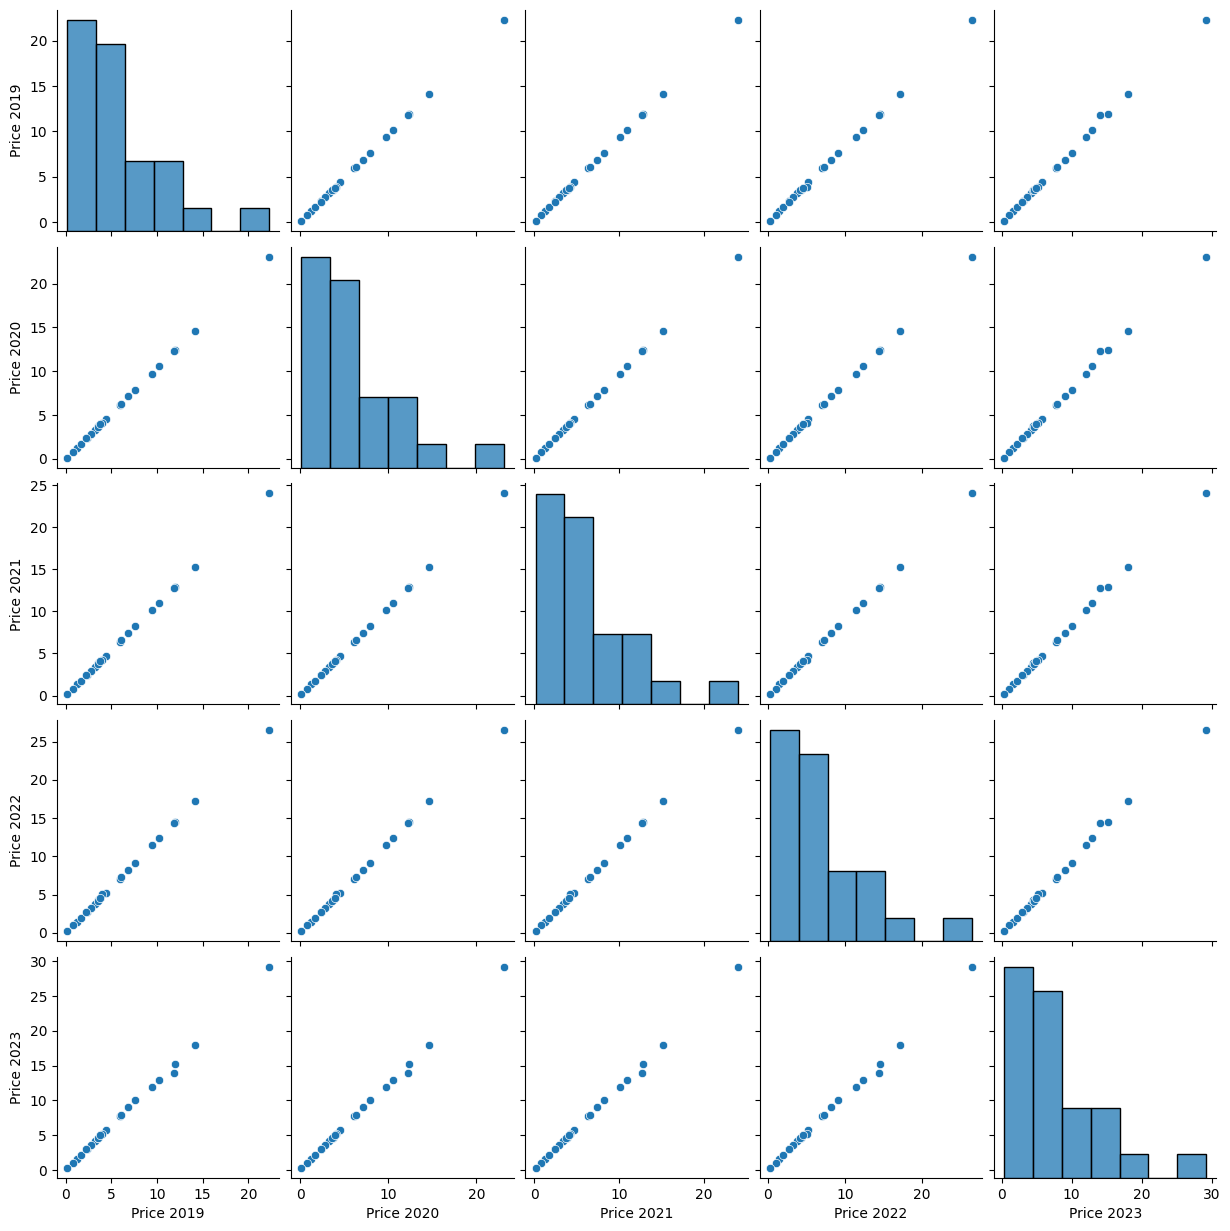

In [6]:
sns.pairplot(data)

In [23]:
x = data.drop(['Product','Price 2023','Currency','Country'],axis=1)
y = data['Price 2023']

In [8]:
x.head(5)

,Price 2019,Price 2020,Price 2021,Price 2022
0,4.39,4.55,4.73,5.22
1,3.20,3.31,3.45,3.80
2,22.28,23.08,24.02,26.51
3,3.80,3.94,4.10,4.52
4,6.87,7.12,7.40,8.17


In [ ]:
y.head(5)

0     5.75
1     4.19
2    29.20
3     4.98
4     9.00
Name: Price 2023, dtype: float64

In [9]:
import numpy as np

In [10]:
def createDataFrame(original, prediciton):
  ids = []
  prices2023 = []
  data = []

  for i in range(0,len(original)):
    ids.append(original.index[i])
    prices2023.append(original[original.index[i]])


  temp =np.array(prediciton)
  for i in range(0, len(ids)):
    item = {}
    item['ProductID'] = ids[i]
    item['Price 2023'] = prices2023[i]
    item['Predicted Price 2023'] = round(temp[i],2)
    data.append(item)


  data = pd.DataFrame(data)
  print(data)


# *Модел 1: Линеарна регресија*

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [12]:
def calculateLinearRegressionScore(x,y):
    model = LinearRegression()
    #60:40
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    createDataFrame(Y_test, y_pred)

    print('Accuracy of linear regression on test set: {:.3f}'.format(r2_score(Y_test, y_pred)))


In [13]:
calculateLinearRegressionScore(x,y)

   ProductID  Price 2023  Predicted Price 2023
0          0        5.75                  5.60
1         23        2.98                  2.87
2         11        5.25                  4.35
3          7       15.21                 14.92
4          4        9.00                  8.70
5         15       12.87                 12.88
6          6        1.61                  1.48
7         20        7.78                  7.72
8         12        1.03                  0.82
9          5       10.00                 10.01
Accuracy of linear regression on test set: 0.995


# *Модел 2: Decision Tree Regression*

In [14]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree

In [15]:
def calculateDecisionTreeRegression(x,y):
    #60:40
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4)

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, Y_train)

    y_pred = regressor.predict(X_test)
    createDataFrame(Y_test, y_pred)
    print("Accuracy of decision tree regressor on test set: {:.3f}".format(r2_score(Y_test, y_pred)))



    plt.figure(figsize=(10,10))
    tree.plot_tree(regressor, feature_names = X_train.columns,
               max_depth=5, filled=True);

   ProductID  Price 2023  Predicted Price 2023
0         16        4.61                  4.56
1         23        2.98                  3.01
2          4        9.00                  5.75
3         21        7.98                  5.75
4          5       10.00                 12.87
5         20        7.78                  5.75
6          8       17.98                 14.00
7          3        4.98                  4.98
8          7       15.21                 14.00
9         10       11.99                 12.87
Accuracy of decision tree regressor on test set: 0.773


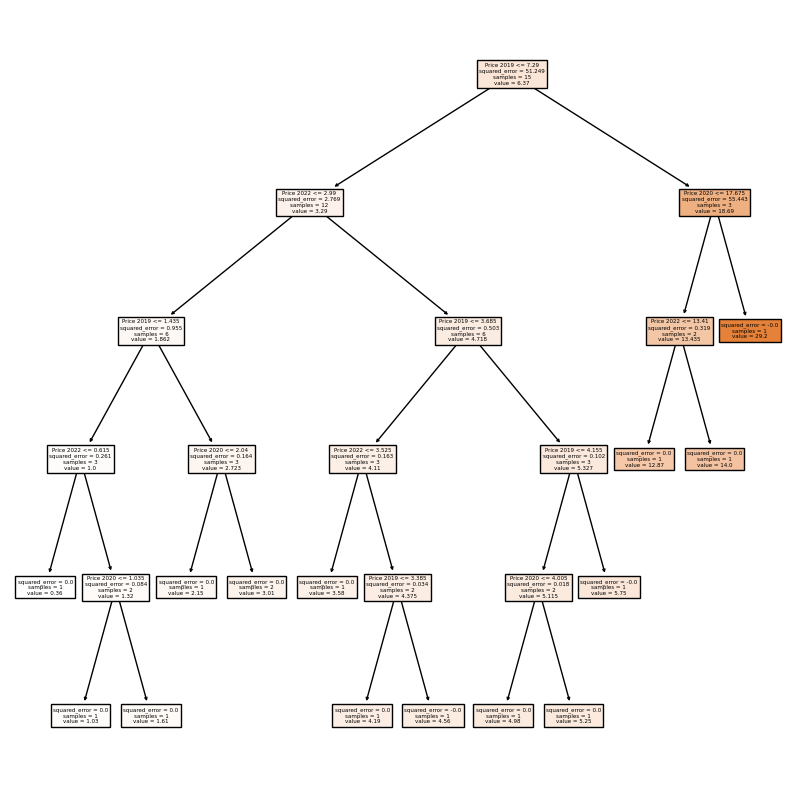

In [16]:
calculateDecisionTreeRegression(x,y)

# *Модел 3: Knn Regression*

In [17]:
from sklearn import neighbors

In [21]:
def calculateKNNRegression(x,y):
    #60:40
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4)
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = neighbors.KNeighborsRegressor(n_neighbors = 5)
    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)
    createDataFrame(Y_test, y_pred)
    print("Accuracy of knn regression on test set: {:.3f}".format(r2_score(Y_test, y_pred)))

In [19]:
calculateKNNRegression(x,y)

   ProductID  Price 2023  Predicted Price 2023
0          0        5.75                  4.51
1         10       11.99                 12.57
2          7       15.21                 12.57
3         16        4.61                  4.51
4         14        0.36                  2.56
5         23        2.98                  3.19
6          6        1.61                  2.56
7         24        4.98                  4.51
8          4        9.00                  6.55
9         20        7.78                  6.55
Accuracy of knn regressior on test set: 0.885


# *Banchmark*

In [48]:
def createDataFrameForCompairing(original, prediciton_model1, prediction_model2, predicition_model3):
  ids = []
  prices2023 = []
  data = []

  for i in range(0,len(original)):
    ids.append(original.index[i])
    prices2023.append(original[original.index[i]])


  temp1 =np.array(prediciton_model1)
  temp2 =np.array(prediction_model2)
  temp3 =np.array(predicition_model3)
  for i in range(0, len(ids)):
    item = {}
    item['ProductID'] = ids[i]
    item['Price 2023'] = prices2023[i]
    item['Predicted Price 2023 - LN'] = round(temp1[i],2)
    item['Predicted Price 2023 - DT'] = round(temp2[i],2)
    item['Predicted Price 2023 - knn'] = round(temp3[i],2)
    data.append(item)


  data = pd.DataFrame(data)
  return data

In [55]:
def compareModels(x,y):
  X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4)
  model1 = LinearRegression()
  model2 = DecisionTreeRegressor()
  model3 = neighbors.KNeighborsRegressor(n_neighbors = 5)

  model1.fit(X_train, Y_train)
  model2.fit(X_train, Y_train)
  model3.fit(X_train, Y_train)

  y_pred_model1 = model1.predict(X_test)
  y_pred_model2 = model2.predict(X_test)
  y_pred_model3 = model3.predict(X_test)

  print(createDataFrameForCompairing(Y_test, y_pred_model1, y_pred_model2, y_pred_model3))

  print("Accuracy of Linear Regression on test set: {:.3f}".format(r2_score(Y_test, y_pred_model1)))
  print("Accuracy of Decision Tree Regression on test set: {:.3f}".format(r2_score(Y_test, y_pred_model2)))
  print("Accuracy of KNN Regression on test set: {:.3f}".format(r2_score(Y_test, y_pred_model3)))


In [54]:
compareModels(x,y)

   ProductID  Price 2023  Predicted Price 2023 - LN  \
0          3        4.98                       4.97   
1          1        4.19                       4.12   
2         17        3.01                       3.01   
3         18        3.01                       3.01   
4         21        7.98                       7.89   
5         20        7.78                       7.63   
6         19        2.15                       2.22   
7          9       14.00                      15.13   
8         16        4.61                       4.54   
9          2       29.20                      28.30   

   Predicted Price 2023 - DT  Predicted Price 2023 - knn  
0                       4.98                        4.82  
1                       4.56                        4.27  
2                       2.98                        3.54  
3                       2.98                        3.54  
4                       9.00                        7.00  
5                       9.00            